In [26]:
# Dependencies
import datetime
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter
import requests
import random
from citipy import citipy

In [27]:

url="https://api.openweathermap.org/data/2.5/weather"
api_key = "dfcce77b90caed738028f45ab2ea7099"
params = {"appid":api_key}

#Creating a data frame with the below coloumns
columns=["City", "Latitude", "Longitude", "Cloudiness", "Humidity", "Max Temp", "Wind Speed", "Country", "Date"]
city_weather_df = pd.DataFrame(columns=columns)


,City,Latitude,Longitude,Cloudiness,Humidity,Max Temp,Wind Speed,Country,Date


In [ ]:
# Creating a counter (initializing with zero)which will break once we get 550cities
num_cities = 0
# get the list of cities
cities = list(citipy.WORLD_CITIES_DICT.keys())
#randomize the city list
random.shuffle(cities)
#Perform API Calls
for city in cities:
    params['lat'] = city[0]
    params['lon'] = city[1]
    req = requests.get(url, params=params)
    print("Requesting URL: " + req.url)
    location = req.json()
    try: 
        city_name = location["name"]
        Latitude=location["coord"]["lat"]
        Longitude=location["coord"]["lon"]
        Cloudiness=location["clouds"]["all"]
        Humidity=location["main"]["humidity"]
        MaxTemp=location["main"]["temp_max"]
        WindSpeed=location["wind"]["speed"]
        Country=location["sys"]["country"]
        Date=location["dt"]
        current_city_data= {
            "City":[city_name],
            "Latitude":[Latitude],
            "Longitude":[Longitude],
            "Cloudiness":[Cloudiness],
            "Humidity":[Humidity],
            "Max Temp":[MaxTemp],
            "Wind Speed":[WindSpeed],
            "Country":[Country],
            "Date":[Date]
        }
        city_weather_df = city_weather_df.append(pd.DataFrame.from_dict(current_city_data))
        num_cities += 1
        if num_cities == 550:
            break
    except KeyError:
        print("Error with city data. Skipping")
        continue

Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=50.733333&lon=3.733333
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=30.192347&lon=116.024959
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=35.899722&lon=14.514722
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=42.1155556&lon=60.0597222
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=47.266667&lon=27.233333
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=55.0881&lon=82.6551
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=14.9958&lon=121.0289
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed7380

Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=24.316667&lon=74.883333
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=1.3346&lon=124.8392
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=15.5211&lon=120.6124
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=42.5277778&lon=-70.9291667
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=-19.233333&lon=-42.466667
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=4.0502778&lon=9.7
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=6.232741&lon=-75.158638
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f

Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=19.016667&lon=-102.1
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=28.682798&lon=-17.763732
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=35.333333&lon=136.866667
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=41.2027778&lon=45.0033333
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=33.9752778&lon=-117.475
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=37.0477778&lon=-80.78
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=10.9629&lon=124.4304
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738

Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=15.803611&lon=-91.315833
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=46.133333&lon=27.083333
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=44.783333&lon=25.116667
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=36.59952&lon=-6.227507
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=52.4167&lon=41.431079
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=43.616667&lon=20.9
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=22.05&lon=82.65
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea

Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=21.466667&lon=-105.116667
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=47.083333&lon=26.533333
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=22.966667&lon=76.066667
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=44.6265&lon=135.3532
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=-23.8597222&lon=35.3472222
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=39.2280556&lon=-84.3541667
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=52.827778&lon=40.466111
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b

Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=51.15&lon=8.3
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=13.522222&lon=122.404167
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=-15.9336111&lon=-72.6588889
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=-23.05&lon=-49.616667
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=14.2166667&lon=-87.0666667
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=40.9388889&lon=44.7725
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=58.304399&lon=52.167539
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed7380

Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=43.848889&lon=43.632778
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=37.716667&lon=-25.433333
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=40.799247&lon=-8.625982
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=6.143526&lon=-75.185323
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=47.420159&lon=8.363006
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=-33.5333333&lon=-56.9
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed738028f45ab2ea7099&lat=43.166667&lon=70.466667
Requesting URL: https://api.openweathermap.org/data/2.5/weather?appid=dfcce77b90caed7

In [29]:
# Display the city_weather Data Frame
city_weather_df.head()


,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Visina,0,RO,1512354600,93,44.58,25.33,276.150,4.10
0,Uspenka,64,UA,1512355878,91,48.39,39.16,277.544,5.51
0,Alexandria,90,CA,1512352800,92,45.30,-74.63,272.150,2.26
0,La Montanita,36,CO,1512355880,92,1.48,-75.44,296.619,1.16
0,Khurda,0,IN,1512352800,87,20.18,85.62,289.150,2.01


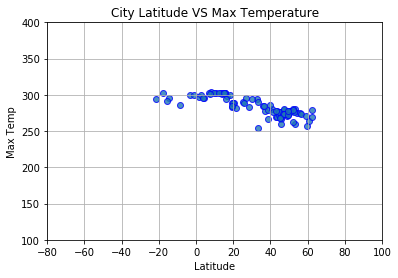

In [30]:
#Scatter plot for Latitude vs Temperature 

plt.scatter(city_weather_df["Latitude"], 
            city_weather_df["Max Temp"],
            edgecolor="blue", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude VS Max Temperature")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([100, 400])
plt.show()


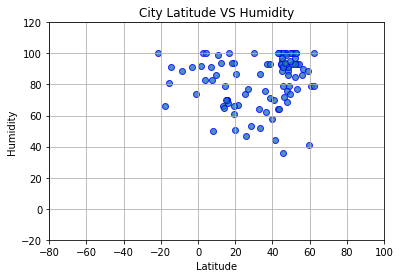

In [31]:
#Scatter plot for Latitude vs. Humidity 
plt.scatter(city_weather_df["Latitude"], 
            city_weather_df["Humidity"],
            edgecolor="blue", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude VS Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-20, 120])
plt.show()


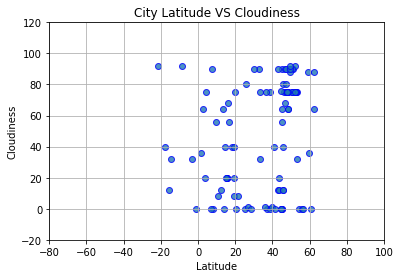

In [32]:
#Scatter plot for Latitude vs. Cloudiness 

plt.scatter(city_weather_df["Latitude"], 
            city_weather_df["Cloudiness"],
            edgecolor="blue", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude VS Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim([-20, 120])
plt.xlim([-80, 100])
plt.show()

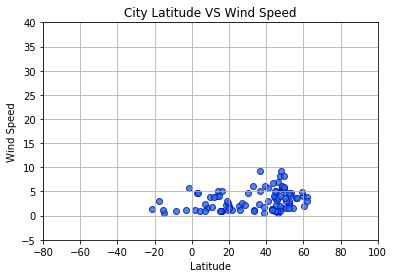

In [33]:
#Scatter plot for Latitude vs. Wind Speed 
plt.scatter(city_weather_df["Latitude"], 
            city_weather_df["Wind Speed"],
            edgecolor="blue", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude VS Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 40])
plt.show()